Problem 1

Data Preprocessing

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder


df = pd.read_csv('/content/eBayAuctions (1).csv')  # Update file path if needed


df['Duration'] = df['Duration'].astype(str)


df_encoded = df.copy()
categorical_columns = ['Category', 'currency', 'Duration', 'endDay']

label_encoders = {}
for col in categorical_columns:
    le = LabelEncoder()
    df_encoded[col] = le.fit_transform(df_encoded[col])
    label_encoders[col] = le


X = df_encoded.drop(columns=['Competitive?'])
y = df_encoded['Competitive?']


X_train, X_valid, y_train, y_valid = train_test_split(X, y, train_size=0.6, random_state=1, stratify=y)


print("Training set size:", X_train.shape)
print("Validation set size:", X_valid.shape)


Training set size: (1183, 7)
Validation set size: (789, 7)


In [4]:
from sklearn.tree import DecisionTreeClassifier, export_text
from sklearn.preprocessing import LabelEncoder

tree = DecisionTreeClassifier(max_depth=7, min_samples_leaf=50, random_state=1)
tree.fit(X_train, y_train)


tree_rules = export_text(tree, feature_names=list(X.columns))
print(tree_rules)

|--- OpenPrice <= 3.69
|   |--- ClosePrice <= 3.64
|   |   |--- OpenPrice <= 2.45
|   |   |   |--- ClosePrice <= 1.24
|   |   |   |   |--- class: 0
|   |   |   |--- ClosePrice >  1.24
|   |   |   |   |--- class: 1
|   |   |--- OpenPrice >  2.45
|   |   |   |--- class: 0
|   |--- ClosePrice >  3.64
|   |   |--- OpenPrice <= 2.46
|   |   |   |--- class: 1
|   |   |--- OpenPrice >  2.46
|   |   |   |--- class: 1
|--- OpenPrice >  3.69
|   |--- ClosePrice <= 10.00
|   |   |--- OpenPrice <= 4.97
|   |   |   |--- class: 0
|   |   |--- OpenPrice >  4.97
|   |   |   |--- ClosePrice <= 6.99
|   |   |   |   |--- class: 0
|   |   |   |--- ClosePrice >  6.99
|   |   |   |   |--- class: 0
|   |--- ClosePrice >  10.00
|   |   |--- OpenPrice <= 10.97
|   |   |   |--- OpenPrice <= 9.89
|   |   |   |   |--- class: 1
|   |   |   |--- OpenPrice >  9.89
|   |   |   |   |--- class: 1
|   |   |--- OpenPrice >  10.97
|   |   |   |--- sellerRating <= 562.00
|   |   |   |   |--- class: 1
|   |   |   |--- selle

b)

 YES the model is practical because it uses only information available before the auction starts , like open price, seller rating , category , currency, duration and end day. This makes it usrful for predicting in real time.

c)

Interesting:

OpenPrice is a strong predictor:
Many rules are based on the opening price, showing it's key to predicting competitiveness.

Low starting prices attract more bids:
Auctions with very low starting prices are more likely to be competitive.

Seller rating and category matter in high-price auctions:
These factors become more important when items are priced higher.

Uninteresting:

Too many specific price splits:
Thresholds like "OpenPrice ≤ 2.45" don’t offer much useful guidance.

Currency and endDay add little value:
These variables rarely influence the outcome in the rules.

Some rules are repetitive:
Similar branches lead to the same result without adding new information.



d)

In [6]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, export_text
from sklearn.preprocessing import LabelEncoder

df = pd.read_csv('/content/eBayAuctions (1).csv')  # Update path if needed


df['Duration'] = df['Duration'].astype(str)

df_encoded = df.copy()
categorical_cols = ['Category', 'currency', 'Duration', 'endDay']
label_encoders = {}

for col in categorical_cols:
    le = LabelEncoder()
    df_encoded[col] = le.fit_transform(df_encoded[col])
    label_encoders[col] = le

X = df_encoded.drop(columns=['ClosePrice', 'Competitive?'])
y = df_encoded['Competitive?']


X_train, X_valid, y_train, y_valid = train_test_split(X, y, train_size=0.6, random_state=1, stratify=y)


tree = DecisionTreeClassifier(max_depth=7, min_samples_leaf=50, random_state=1)
tree.fit(X_train, y_train)


rules = export_text(tree, feature_names=list(X.columns))
print(rules)


|--- OpenPrice <= 3.69
|   |--- OpenPrice <= 1.77
|   |   |--- sellerRating <= 677.00
|   |   |   |--- sellerRating <= 115.50
|   |   |   |   |--- class: 1
|   |   |   |--- sellerRating >  115.50
|   |   |   |   |--- class: 1
|   |   |--- sellerRating >  677.00
|   |   |   |--- currency <= 0.50
|   |   |   |   |--- class: 1
|   |   |   |--- currency >  0.50
|   |   |   |   |--- endDay <= 1.50
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- endDay >  1.50
|   |   |   |   |   |--- class: 1
|   |--- OpenPrice >  1.77
|   |   |--- sellerRating <= 2483.00
|   |   |   |--- sellerRating <= 950.00
|   |   |   |   |--- class: 1
|   |   |   |--- sellerRating >  950.00
|   |   |   |   |--- class: 1
|   |   |--- sellerRating >  2483.00
|   |   |   |--- class: 0
|--- OpenPrice >  3.69
|   |--- sellerRating <= 660.50
|   |   |--- OpenPrice <= 9.91
|   |   |   |--- class: 0
|   |   |--- OpenPrice >  9.91
|   |   |   |--- class: 1
|   |--- sellerRating >  660.50
|   |   |--- Category <= 13.50
|

e)

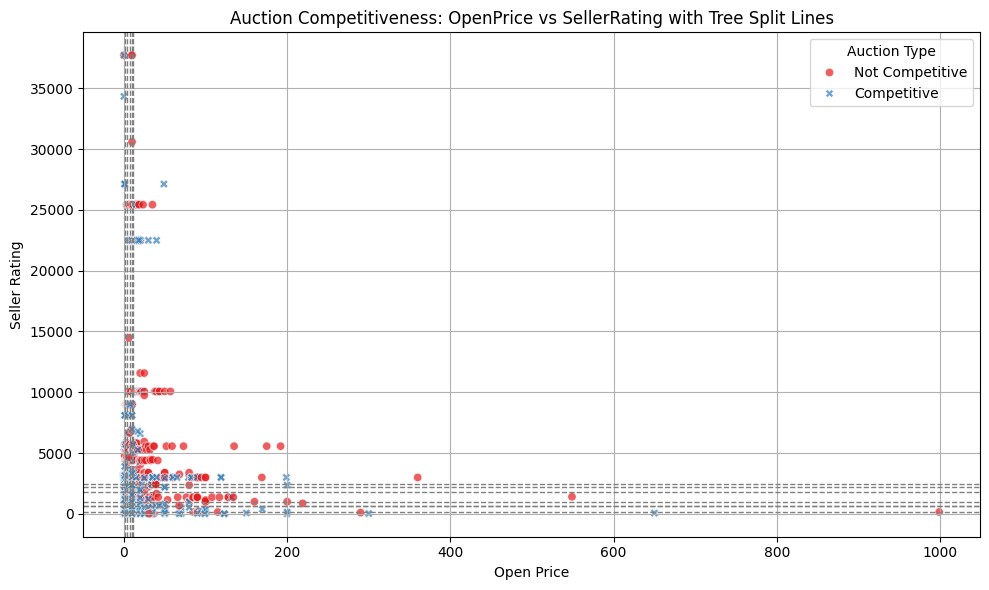

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Create a label column for clarity
df['Competitive'] = df['Competitive?'].map({0: 'Not Competitive', 1: 'Competitive'})


x_col = 'OpenPrice'
y_col = 'sellerRating'


plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=df,
    x=x_col,
    y=y_col,
    hue='Competitive',
    style='Competitive',
    palette='Set1',
    alpha=0.7
)


split_lines_x = [1.77, 3.69, 7.43, 9.91, 11.28]
split_lines_y = [115.5, 660.5, 677, 950, 1831.5, 2179.5, 2483]


for x in split_lines_x:
    plt.axvline(x=x, color='gray', linestyle='--', linewidth=1)


for y in split_lines_y:
    plt.axhline(y=y, color='gray', linestyle='--', linewidth=1)


plt.title('Auction Competitiveness: OpenPrice vs SellerRating with Tree Split Lines')
plt.xlabel('Open Price')
plt.ylabel('Seller Rating')
plt.legend(title='Auction Type')
plt.grid(True)
plt.tight_layout()
plt.show()


f)

Confusion Matrix:
 [[265  97]
 [124 303]]

Accuracy: 0.7198986058301647

Classification Report:
               precision    recall  f1-score   support

           0       0.68      0.73      0.71       362
           1       0.76      0.71      0.73       427

    accuracy                           0.72       789
   macro avg       0.72      0.72      0.72       789
weighted avg       0.72      0.72      0.72       789



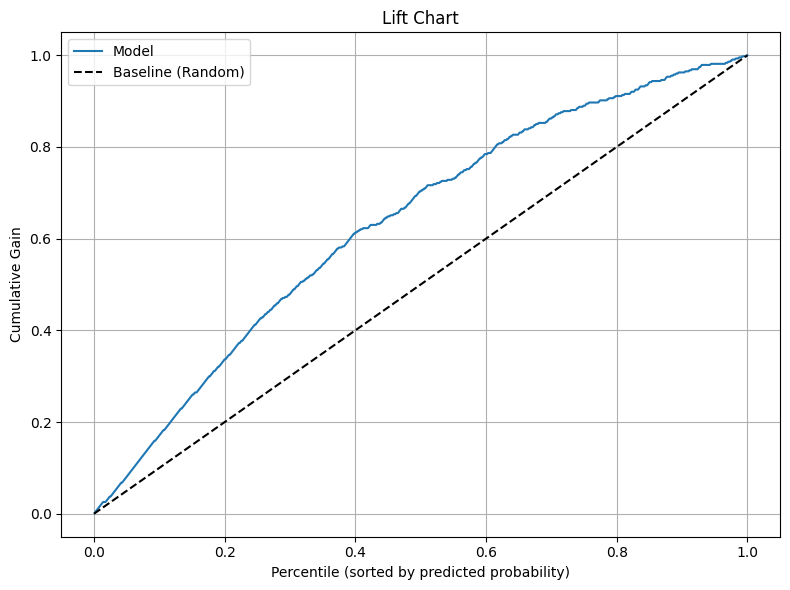

In [11]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import numpy as np


y_pred = tree.predict(X_valid)
y_proba = tree.predict_proba(X_valid)[:, 1]


conf_matrix = confusion_matrix(y_valid, y_pred)
accuracy = accuracy_score(y_valid, y_pred)
report = classification_report(y_valid, y_pred)

print("Confusion Matrix:\n", conf_matrix)
print("\nAccuracy:", accuracy)
print("\nClassification Report:\n", report)


lift_data = pd.DataFrame({'actual': y_valid, 'proba': y_proba})
lift_data = lift_data.sort_values(by='proba', ascending=False)
lift_data['cumulative_actual'] = lift_data['actual'].cumsum()
lift_data['percentile'] = np.arange(1, len(lift_data) + 1) / len(lift_data)
lift_data['cumulative_gain'] = lift_data['cumulative_actual'] / lift_data['actual'].sum()


plt.figure(figsize=(8, 6))
plt.plot(lift_data['percentile'], lift_data['cumulative_gain'], label='Model')
plt.plot([0, 1], [0, 1], 'k--', label='Baseline (Random)')
plt.title('Lift Chart')
plt.xlabel('Percentile (sorted by predicted probability)')
plt.ylabel('Cumulative Gain')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


g)

key findings :

1. Opening price is the most inflential factor.

2. Seller rating matters only when the the price is higher.

3. Duration , currency and end day have minimal impact.

Recomendation:

1. Setting a low opening price to draw out more interest initially and can drive up the final price.

2. building and maintaining a strong seller rating.

3. Do not focus the decisions over duration , currency and end day as they have minor influence.




Problem 3

a)

i)

In [3]:
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder


df = pd.read_csv('/content/ToyotaCorolla.csv')


predictors = ['Age_08_04', 'KM', 'HP', 'Automatic', 'Doors', 'Quarterly_Tax',
              'Mfr_Guarantee', 'Guarantee_Period', 'Airco', 'Automatic_airco',
              'CD_Player', 'Powered_Windows', 'Sport_Model', 'Tow_Bar']


fuel_dummies = pd.get_dummies(df['Fuel_Type'], prefix='Fuel', drop_first=True)


df_model = pd.concat([df[predictors], fuel_dummies, df['Price']], axis=1)


X = df_model.drop(columns='Price')
y = df_model['Price']


X_train, X_valid, y_train, y_valid = train_test_split(X, y, train_size=0.6, random_state=1)


tree = DecisionTreeRegressor(random_state=1)
tree.fit(X_train, y_train)


importances = pd.Series(tree.feature_importances_, index=X.columns)
top_features = importances.sort_values(ascending=False).head(4)
print("Top 3–4 most important car specifications for predicting Price:\n")
print(top_features)


Top 3–4 most important car specifications for predicting Price:

Age_08_04          0.844867
HP                 0.053789
KM                 0.049601
Automatic_airco    0.013358
dtype: float64


ii)


Training RMSE: 0.0
Validation RMSE: 1492.34


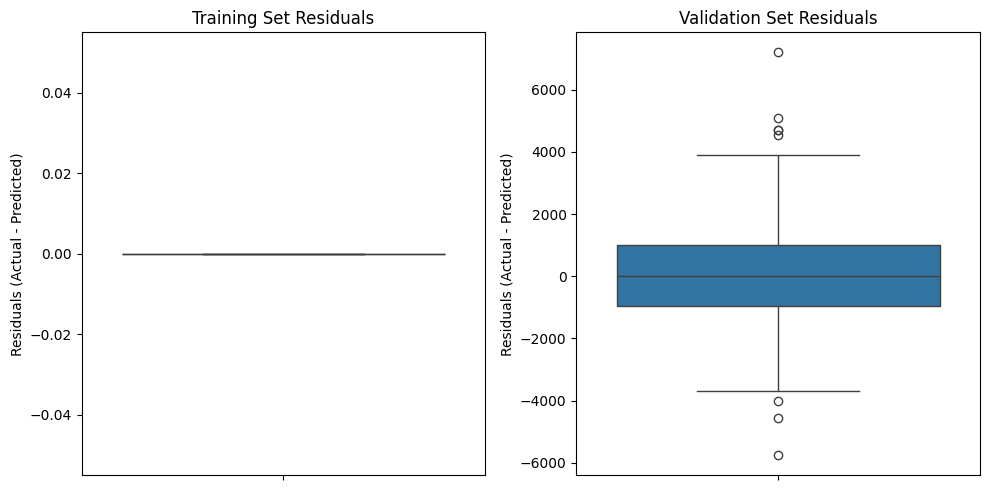

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error


y_train_pred = tree.predict(X_train)
y_valid_pred = tree.predict(X_valid)


train_residuals = y_train - y_train_pred
valid_residuals = y_valid - y_valid_pred


rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
rmse_valid = np.sqrt(mean_squared_error(y_valid, y_valid_pred))

print("Training RMSE:", round(rmse_train, 2))
print("Validation RMSE:", round(rmse_valid, 2))


plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
sns.boxplot(y=train_residuals)
plt.title('Training Set Residuals')
plt.ylabel('Residuals (Actual - Predicted)')

plt.subplot(1, 2, 2)
sns.boxplot(y=valid_residuals)
plt.title('Validation Set Residuals')
plt.ylabel('Residuals (Actual - Predicted)')

plt.tight_layout()
plt.show()


The RMSE value of the training set is lower than that of the validation set because of the overfitting.

The box plot of the training set is less spread while compared to validation because the regression model memorises the training data capturing all the noise and not generalising well to new unseen data.

iii)

1. limiting the tree depth

2. Set a min number of samples per leaf to avoid the model to learn from the noise .

3. set a min no of samples for a split.

4. tuning the tree to find the right balance between underfitting and overfitting.

iv)

In [5]:
from sklearn.model_selection import train_test_split, GridSearchCV

param_grid = {
    'max_depth': [3, 4, 5, 6, 7, 8, None],
    'min_samples_leaf': [10, 20, 30, 40, 50, 60]
}

grid_search = GridSearchCV(DecisionTreeRegressor(random_state=1),
                           param_grid,
                           cv=5,
                           scoring='neg_mean_squared_error',
                           n_jobs=-1)
grid_search.fit(X_train, y_train)

print("\nBest parameters found by GridSearchCV:")
print(grid_search.best_params_)


best_tree = grid_search.best_estimator_
y_train_pred_best = best_tree.predict(X_train)
y_valid_pred_best = best_tree.predict(X_valid)

rmse_train_best = np.sqrt(mean_squared_error(y_train, y_train_pred_best))
rmse_valid_best = np.sqrt(mean_squared_error(y_valid, y_valid_pred_best))
print("\nFine-tuned Tree Performance:")
print("Training RMSE:", round(rmse_train_best, 2))
print("Validation RMSE:", round(rmse_valid_best, 2))


Best parameters found by GridSearchCV:
{'max_depth': 8, 'min_samples_leaf': 10}

Fine-tuned Tree Performance:
Training RMSE: 1071.06
Validation RMSE: 1226.17


The fine tuned tree has better prdictive performance on the validation set than the fyl grown tree.

b)

i)

In [8]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.metrics import mean_squared_error, accuracy_score

df = pd.read_csv("ToyotaCorolla.csv")  # Update path if needed


predictors = ['Age_08_04', 'KM', 'HP', 'Automatic', 'Doors', 'Quarterly_Tax',
              'Mfr_Guarantee', 'Guarantee_Period', 'Airco', 'Automatic_airco',
              'CD_Player', 'Powered_Windows', 'Sport_Model', 'Tow_Bar']


fuel_dummies = pd.get_dummies(df['Fuel_Type'], prefix='Fuel', drop_first=True)
df_model = pd.concat([df[predictors], fuel_dummies, df['Price']], axis=1)


kb = KBinsDiscretizer(n_bins=20, encode='ordinal', strategy='quantile')
df_model['Binned_Price'] = kb.fit_transform(df_model[['Price']]).astype(int)

X = df_model.drop(columns=['Price', 'Binned_Price'])
y_reg = df_model['Price']
y_clf = df_model['Binned_Price']


X_train, X_valid, y_train_reg, y_valid_reg = train_test_split(X, y_reg, train_size=0.6, random_state=1)
_, _, y_train_clf, y_valid_clf = train_test_split(X, y_clf, train_size=0.6, random_state=1)

# -------------------- Regression Tree --------------------
reg_tree = DecisionTreeRegressor(max_depth=8, min_samples_leaf=10, random_state=1)
reg_tree.fit(X_train, y_train_reg)
y_pred_reg = reg_tree.predict(X_valid)
rmse_reg = np.sqrt(mean_squared_error(y_valid_reg, y_pred_reg))

# -------------------- Classification Tree with GridSearchCV --------------------
param_grid = {
    'max_depth': [3, 4, 5, 6, 7, 8],
    'min_samples_leaf': [10, 20, 30, 50]
}

grid_search_ct = GridSearchCV(
    estimator=DecisionTreeClassifier(random_state=1),
    param_grid=param_grid,
    scoring='accuracy',
    cv=5,
    n_jobs=-1
)

grid_search_ct.fit(X_train, y_train_clf)
best_ct = grid_search_ct.best_estimator_
y_pred_clf = best_ct.predict(X_valid)
accuracy_clf = accuracy_score(y_valid_clf, y_pred_clf)

# -------------------- Model Comparison --------------------
print("✅ Regression Tree:")
print("Best Params: max_depth=8, min_samples_leaf=10")
print("Validation RMSE:", round(rmse_reg, 2))
print("Tree Depth:", reg_tree.tree_.max_depth)
print("Tree Size (nodes):", reg_tree.tree_.node_count)
print("Top Predictors:\n", pd.Series(reg_tree.feature_importances_, index=X.columns).sort_values(ascending=False).head(5))

print("\n✅ Classification Tree:")
print("Best Params:", grid_search_ct.best_params_)
print("Validation Accuracy:", round(accuracy_clf, 4))
print("Tree Depth:", best_ct.tree_.max_depth)
print("Tree Size (nodes):", best_ct.tree_.node_count)
print("Top Predictors:\n", pd.Series(best_ct.feature_importances_, index=X.columns).sort_values(ascending=False).head(5))


/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_discretization.py:306: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 0 are removed. Consider decreasing the number of bins.
  warnings.warn(


✅ Regression Tree:
Best Params: max_depth=8, min_samples_leaf=10
Validation RMSE: 1226.17
Tree Depth: 8
Tree Size (nodes): 115
Top Predictors:
 Age_08_04          0.893234
HP                 0.055898
KM                 0.022412
Automatic_airco    0.012227
Quarterly_Tax      0.004876
dtype: float64

✅ Classification Tree:
Best Params: {'max_depth': 5, 'min_samples_leaf': 30}
Validation Accuracy: 0.2678
Tree Depth: 5
Tree Size (nodes): 31
Top Predictors:
 Age_08_04          0.731470
KM                 0.093653
Automatic_airco    0.064319
Quarterly_Tax      0.050105
Powered_Windows    0.027076
dtype: float64


Yes, the CT and RT are different in structure, top predictors, and size. RT builds a deeper, more detailed model to predict exact prices, while CT builds a simpler tree that struggles with classifying many uneven price bins
 leading to lower accuracy and different decision splits.










ii)

In [9]:
input_data = {
    'Age_08_04': 77,
    'KM': 117000,
    'HP': 110,
    'Automatic': 0,
    'Doors': 5,
    'Quarterly_Tax': 100,
    'Mfr_Guarantee': 0,
    'Guarantee_Period': 3,
    'Airco': 1,
    'Automatic_airco': 0,
    'CD_Player': 0,
    'Powered_Windows': 0,
    'Sport_Model': 0,
    'Tow_Bar': 1,
    'Fuel_Fuel_Type_Diesel': 0,
    'Fuel_Fuel_Type_Petrol': 1
}

# Create input DataFrame
X_input = pd.DataFrame([input_data])

# Ensure all required columns are present
for col in X.columns:
    if col not in X_input.columns:
        X_input[col] = 0
X_input = X_input[X.columns]  # match column order

# Predict using both models
predicted_price_rt = reg_tree.predict(X_input)[0]
predicted_bin_ct = best_ct.predict(X_input)[0]
price_bin_range = kb.inverse_transform([[predicted_bin_ct]])[0]

# Print results
print("Regression Tree Prediction (RT): €", round(predicted_price_rt, 2))
print("Classification Tree Prediction (CT): Price Range €",
      round(price_bin_range[0], 2), "–", round(price_bin_range[0], 2))

Regression Tree Prediction (RT): € 6920.0
Classification Tree Prediction (CT): Price Range € 5625.0 – 5625.0


The regression tree delivers a more precise price estimation which makes it suitable for exact valuation purposes. The classification tree maintains straightforward interpretation of price tiers yet produces less accurate results because it depends on fixed price ranges particularly when these ranges are narrow or unevenly distributed.